In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz


In [2]:
def plotCharts (y, step, mini, maxi):
    x = np.array(np.linspace(mini, maxi, step))
    #x = np.array(np.arange(mini, maxi, step))
    for i, array in enumerate(y):
        plt.plot(x,array)
    

In [3]:
#Trapezoidal
def trapeze (x, a, m,n, b):
    vet = []
    for var in x:
        vet.append(max(min((var-a)/(m-a), 1, (b-var)/(b-n)), 0))
    return vet

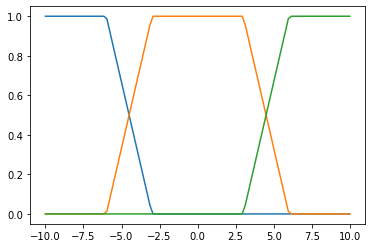

In [4]:
#Variações de x- passo

points = 100
x = np.linspace(-10, 10, num = points)
#x = np.arange(-10, 10, 0.1)



#array de funções
A1 = []
C1 = []

# Antecendente
a1 = trapeze(x, -20, -15, -6, -3)
a2 = trapeze(x, -6, -3, 3 , 6)
a3 = trapeze(x,  3 , 6, 15, 20)
A = [a1, a2, a3]

plotCharts(A,points,-10, 10 )


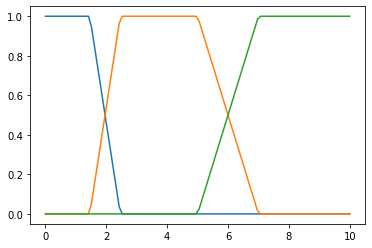

In [5]:
# Consequente
y = np.linspace(0, 10, num = points)
#y = np.arange(0,10,0.05)
c1 = trapeze(y,-2.46,-1.46, 1.46, 2.46)
c2 = trapeze(y,1.46,2.46,5 , 7)
c3 = trapeze(y,5 ,7, 13, 15)
C = [c1, c2, c3]

plotCharts(C,points,0,10)

In [6]:
# Função de Interseção - Mínimo
def interMin (y1, y2):
    vet = []
    for i in range(len(y1)): 
        vet.append(min(y1[i], y2))
    return np.array(vet)

# Função de união - Máximo
def unionMax (y1, y2):
    vet = []
    
    for i in range(np.size(y1)): 
        vet.append(max(y1[i], y2[i]))
    return vet

In [7]:
def mandani(A,C, x):
    defuzzy = []
    vet = [[],[],[]]
    for i in range(0,len(y), 1):
        vet[0].append(interMin(A[0], C[2][i]))
        vet[1].append(interMin(A[1], C[1][i]))   
        vet[2].append(interMin(A[2], C[0][i]))
        maxi = [unionMax(unionMax(vet[0][i], vet[1][i]), vet[2][i])]
        defuzzy.append(fuzz.defuzz(x, np.array(maxi), 'lom'))

    return defuzzy 


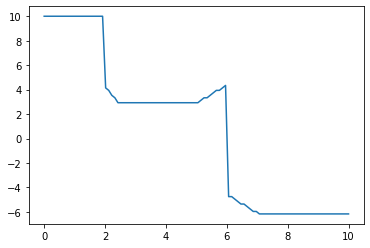

In [8]:
    
result = mandani(A, C, x)
plotCharts([result], 100,0, 10)
#plotCharts([A1[0], A1[1]],  0.1,-25, 25)
#plotCharts([result],  0.075,-5, 10)